In [1]:
# import necerssary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create dataset as numpy array
data = np.array([[40, 20],
                [55, 30],
                [70, 60],
                [50, 35],
                [45, 40],
                [62, 75],
                [45, 30],
                [68, 80],
                [80, 70],
                [75, 90]])

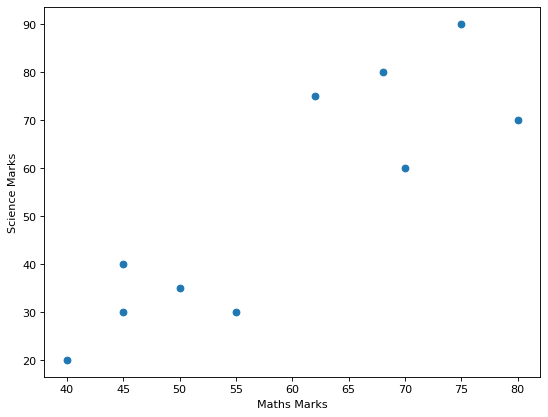

In [3]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("Maths Marks")
plt.ylabel("Science Marks")
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-1.43299332 -1.39951173]
 [-0.3016828  -0.97541727]
 [ 0.82962771  0.29686613]
 [-0.67878631 -0.76337004]
 [-1.05588981 -0.5513228 ]
 [ 0.2262621   0.93300782]
 [-1.05588981 -0.97541727]
 [ 0.67878631  1.14505506]
 [ 1.58383472  0.72096059]
 [ 1.20673122  1.56914952]]


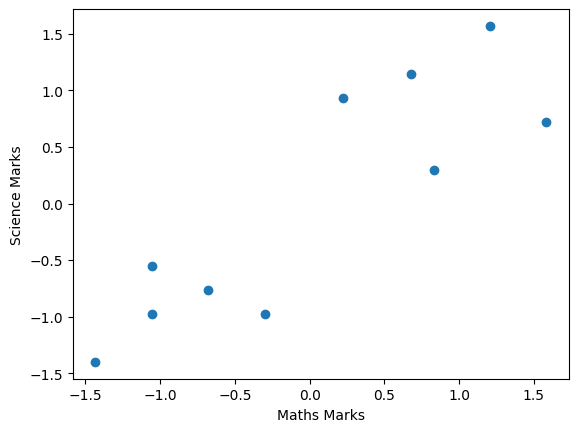

In [5]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1])
plt.xlabel("Maths Marks")
plt.ylabel("Science Marks")
plt.show()

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [8]:
pca.explained_variance_

array([775.27373895,  37.83737216])

In [9]:
pca.explained_variance_ratio_

array([0.95346593, 0.04653407])

In [10]:
pca = PCA(n_components=1)
pca.fit(data)

PCA(n_components=1)

In [11]:
pca.explained_variance_

array([775.27373895])

In [12]:
data_pca = pca.transform(data)
print("Original shape:", data.shape)
print("Transformed shape:", data_pca.shape)

Original shape: (10, 2)
Transformed shape: (10, 1)


In [13]:
data

array([[40, 20],
       [55, 30],
       [70, 60],
       [50, 35],
       [45, 40],
       [62, 75],
       [45, 30],
       [68, 80],
       [80, 70],
       [75, 90]])

In [14]:
data_pca

array([[-38.04528819],
       [-22.24513011],
       [ 11.29118006],
       [-20.1217861 ],
       [-17.9984421 ],
       [ 20.8961837 ],
       [-26.86651814],
       [ 28.10305454],
       [ 24.78064413],
       [ 40.2061022 ]])

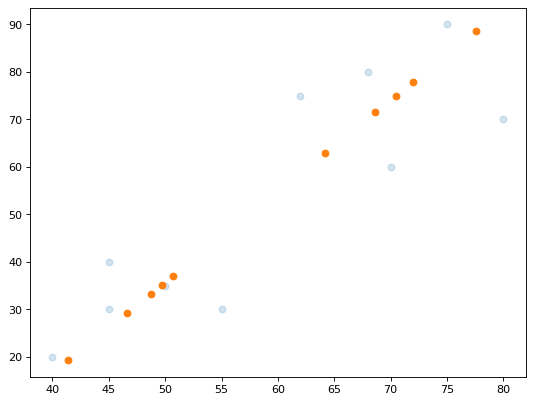

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
new_data = pca.inverse_transform(data_pca)
plt.scatter(data[:, 0], data[:, 1], alpha=0.2)
plt.scatter(new_data[:, 0], new_data[:, 1])

# PCA for visualization

In [16]:
from sklearn.datasets import load_digits

In [18]:
digits = load_digits()
digits.data.shape

(1797, 64)

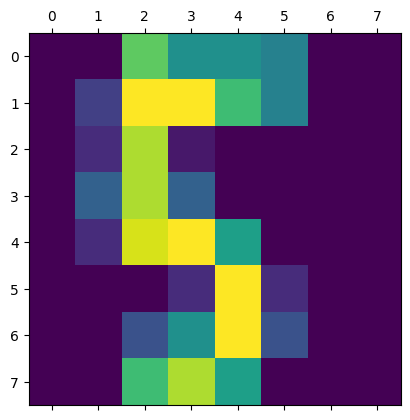

In [21]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[25])
plt.show()

In [22]:
digits.target[25]

5

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_data = pca.fit_transform(digits.data)
print(digits.data.shape)
print(new_data.shape)

(1797, 64)
(1797, 2)


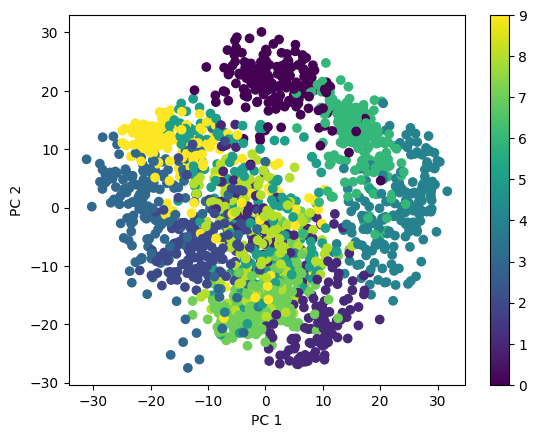

In [24]:
import matplotlib.pyplot as plt
plt.scatter(new_data[:, 0], new_data[:, 1], c=digits.target)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()

# **PCA For Speeding up Models**

In [34]:
from sklearn.datasets import load_digits
import numpy as np

In [35]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_data = sc.fit_transform(digits.data)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_data, digits.target, test_size=0.2, random_state=42)

In [56]:
x_train.shape

(1437, 64)

In [57]:
x_test.shape

(360, 64)

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
import time

start = time.time()

model.fit(x_train, y_train)

end = time.time()

print('Time: ' + str((end - start)*1000) + ' ms')

Time: 174.2095947265625 ms


In [44]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9722222222222222

# Check After applying PCA

In [45]:
from sklearn.datasets import load_digits
import numpy as np

In [46]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_data = sc.fit_transform(digits.data)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data_pca = pca.fit_transform(new_data)

In [50]:
from sklearn.model_selection import train_test_split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(new_data_pca, digits.target, test_size=0.2, random_state=42)

In [51]:
x_train_pca.shape

(1437, 10)

In [52]:
x_test_pca.shape

(360, 10)

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
import time

start = time.time()

model.fit(x_train_pca, y_train_pca)

end = time.time()

print('Time: ' + str((end - start)*1000) + ' ms')

Time: 99.25484657287598 ms


In [60]:
from sklearn.metrics import accuracy_score
y_pred_pca = model.predict(x_test_pca)
accuracy_score(y_test_pca, y_pred_pca)

0.8972222222222223